### Images Directory to DataFrame with MultiLabels:

* Images are scraped from google image manually:
   * [blog link for scraping](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)
   * images are saved in a local file (can't distribute due to copyrights)
     * edit image directory for your own code if use this notebook
     
 -----
 
 #### Import Necessary Libaries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
def dict_from_data():
    '''
    input: a folder structure (data with subfolders with label as the foldername, glasses,beard, and hats)
            this folder structure is in a local folder, not accessible, please modify function for your usages
    output: a dictionary with imagename and labels as a list
    '''
    result = {} # final dictionary
    for dirname, _, files in os.walk('/Datastore/cropped'):
        if len(dirname)<=18: # ignore other filess in the cropped folders 
            continue
        label = os.path.split(dirname)[-1]
        for pic in files:
            if pic == '.DS_Store': # mac issue, make sure it is not in the dictionary
                continue
            if pic in result:
                result[pic].append(label)
            else:
                result[pic]=[label]
    return result 

#### Convert Image data directories into a dictionary

In [3]:
img_dict =dict_from_data()

#### Convert into pandas dataframe for transfer learning 

In [4]:
# create pics_name in sorted order (lowest jpg number to highest jpg number )
pics_sorted = sorted(img_dict.keys())

In [7]:
def create_columns_labels(img_dict, pics_names, labelnames):
    '''
    inputs: 
    img_dict: created from dict_from_data function 
    pics_names: jpg names, key in dict but sorted 
    labelnames for the column a list of strings: glasses, hats, beard
    output: an organized dictioanry of label: [0 or 1 ...]
    '''
    col_dict = {}
    for pic in pics_names:
        val = img_dict[pic]
        for label in labelnames:
            if label not in col_dict:
                col_dict[label] = list()
            if label in val:
                col_dict[label].append(1)
            else:
                col_dict[label].append(0)
    return col_dict

#### create pandas dataframe with 0 and 1 multilabels

In [8]:
col_dict = create_columns_labels(img_dict, pics_sorted, ['eyewear','hat','beard'])

In [9]:
pic_df = pd.DataFrame(col_dict, index=pics_sorted)

#### Check class balances for one vs all classifier using transfer learning 

___

#### glasses 

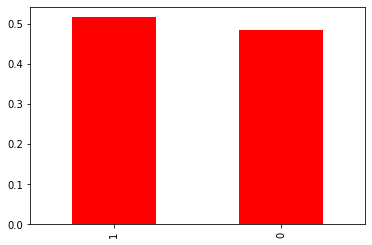

In [10]:
pic_df.eyewear.value_counts(normalize=True).plot.bar(color = 'red')
plt.show()

---
#### hats

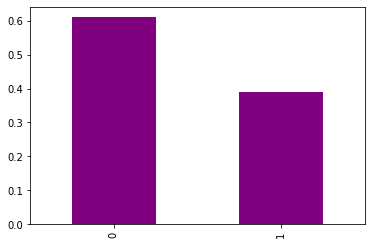

In [11]:
pic_df.hat.value_counts(normalize=True).plot.bar(color = 'purple')
plt.show()

#### beard

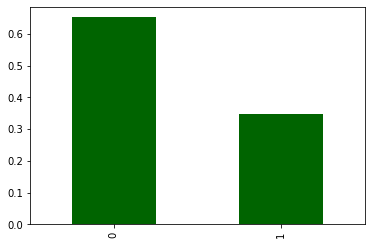

In [12]:
pic_df.beard.value_counts(normalize=True).plot.bar(color = 'darkgreen')
plt.show()

#### Save finished dataframe as pickel files

In [13]:
pic_df.to_pickle('../pickle_files/pic_df.pkl')

In [14]:
pic_df = pd.read_pickle('../pickle_files/pic_df.pkl')

In [15]:
pic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 00018.jpg to 01359.jpg
Data columns (total 3 columns):
eyewear    653 non-null int64
hat        653 non-null int64
beard      653 non-null int64
dtypes: int64(3)
memory usage: 20.4+ KB
